In [0]:
!pip install pyroomacoustics
import numpy as np
import pyroomacoustics as pra
import matplotlib.pyplot as plt


     |████████████████████████████████| 174kB 9.5MB/s 
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.3.1-cp36-cp36m-linux_x86_64.whl size=500583 sha256=cc8e8ac70bdd8a386594ced304d16af14a24bb672eb84a4bc882e78969ff1295
  Stored in directory: /root/.cache/pip/wheels/c0/52/61/0ddd138323a04e990d2d3e87376aaddd19cecad171f0d0df7d
Successfully built pyroomacoustics


# Data Preparation

In [0]:
#import dataset
#perform preprocessing
#divide into train/test sets
#

From Pyroomacoustics Github demo

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


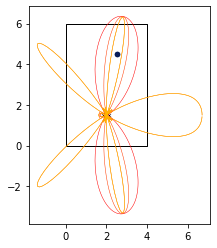

In [0]:
# Create a 4 by 6 metres shoe box room
room = pra.ShoeBox([4,6])

# Add a source somewhere in the room
room.add_source([2.5, 4.5])

# Create a linear array beamformer with 4 microphones
# with angle 0 degrees and inter mic distance 10 cm
R = pra.linear_2D_array([2, 1.5], 4, 0, 0.1)
room.add_microphone_array(pra.Beamformer(R, room.fs))

# Now compute the delay and sum weights for the beamformer
room.mic_array.rake_delay_and_sum_weights(room.sources[0][:1])

# plot the room and resulting beamformer
room.plot(freq=[1000, 2000, 4000, 8000], img_order=0)
plt.show()

# Data Distributions


In [0]:
class room_distribution(object):

  def __init__(self, num_rooms):
    self.rooms = []
    #TODO: create a distribution of PRA rooms
    for i in range(num_rooms):
      dims = np.random.randint(low=1, high=10, size=2)
      room = pra.ShoeBox(dims, fs=16000)
      self.rooms.append(room)

  def sample_source(self, room: pra.Room):
    walls = room.walls
    for wall in walls:
      if wall.corners[0][0] == wall.corners[1][0]:
        y_len = np.abs(wall.corners[0][1] - wall.corners[1][1])
      else:
        x_len = np.abs(wall.corners[0][0] - wall.corners[1][0])
    y_pos = np.random.uniform(low=0, high=y_len)
    x_pos = np.random.uniform(low=0, high=x_len)
    d = []
    d.append(x_pos)
    d.append(y_pos)
    d = np.asarray(d)
    #print('dims', x_len, ', ', y_len)
    #print('d', d[0], ', ', d[1])
    #print(d.shape[0])
    return pra.SoundSource(position=d)
  
  def sample_mic(self, room: pra.Room):
    pass

  #returns a room populated with a source and microphone array, drawn from the random distributions
  def sample(self):
    #TODO: add a random source and microphone to a random room, then return
    room = np.random.choice(self.rooms)
    source = self.sample_source(room)
    print(source.dim)
    print(np.asarray(source.position).shape[1])
    mic = self.sample_mic(room)
    room.add_source(source)
    #room.add_microphone_array(mic)
    return room
  

# Preliminary analysis

In this section we analyze the robustness of the classifiers with clean audio in simulated over-the-air environments

In [0]:
#TODO: set up model(s)

In [0]:
#TODO: evaluate model(s) with clean, untransformed signal

In [0]:
#TODO: transform clean signal and evaluate model(s)

# Training with Data Augmentation

# Final Analysis